## Abstract

In this project, we will use the data set called SGEMM GPU Kernel Performance
Data set from UCI Machine Learning Repository to make the
predictions of the computer GPU run-time causes of different factors. The
goal of this project is to use Linear Regression as the base model to make
the predictions. Then, we will use the KNN (K-Nearest Neighbors) and
Neural Network as the comparisons.

## Data Description

The data is obtained from UCI Machine Learning Repository website.
You can find the data from the link here, Data Link: https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance. This data
contains 241600 rows and 18 columns. Fortunately, this data does not
have any missing values. To better describe the data, we have generated
the Table 1 to show the variable descriptions. The majority of the variables
are numerical variables and they are in integer types. All the categorical
variables such as STRM, STRN, SA, and SB have already been encoded in
a binary set {1, 0}. As the scope of this project, the target variables will
be the average Runtime of Run 1, Run 2, Run 3, and Run 4 (i.e. different
runtime for the GPU).


$\textrm{MWG} = \{16, 32, 64, 128\}$

$\textrm{NWG} = \{16, 32, 64, 128\}$

$\textrm{MWG} \times \textrm{NWG} = |\textrm{MWG}| * |\textrm{NWG}| = 4 \times 4 = 16$

$\textrm{KWG} = \{16, 32\}$

$\textrm{MDIMC} = \{8, 16, 32\}$

$\textrm{MDIMA} = \{8,16,32\}$

$\textrm{NDIMB} = \{16, 32, 64, 128\}$

$\textrm{KWI} = \{2,8\}$: Kernel loop unrolling factor

$\textrm{VWM} = \{1,2,4,8\}$

$\textrm{VMN} = \{1,2,4,8\}$

$\textrm{STRM} = \{0,1\}$

$\textrm{SA} = \{0,1\}$

$\textrm{SB} = \{0,1\}$

Run1(Run2, Run3, Run4): Performance times in milliseconds for 4 independent runs using the same parameters.


## Methods

### Linear Regression
This model will be served as the base model for
the prediction. The idea is to try to fit our data using a linear line
that goes through the origin to make the data prediction. The goal
is to choose the coefficients such that the error between the predicted
values and true values can be minimized.

### KNN
This model will be served as one of the comparison models to
the linear regression. KNN model can be used in both classification
and regression problems. Our problem will be called a KNN regressor
(i.e. the regression problem). The idea is to choose the k nearest
neighbors and calculate their average value of them and set the value
of the new variable equal to the average. The k value (i.e. the number
of nearest neighbors) is the important parameter in KNN model. As
in linear regression, we will test different k values and choose the best
one to fit our data.

### Neural Network
This model will also be compared with the based
model, linear regression. We will perform the forward propagation and
we will use a multilayer neural network. The output for this model will
be calculated layer by layer.

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from imblearn.over_sampling import SMOTE
from copy import copy
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import timeit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential

## Load Dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Project Dataset(2).csv to Project Dataset(2).csv


In [ ]:
df = pd.read_csv("Project Dataset(2).csv")

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df.shape

(241600, 18)

In [ ]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

### Find the average runtime

In [ ]:
# Average the runtime
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [ ]:
df1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


## Data Pre-Processing

### Missing Values

### Duplicate Values

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

We have a very complete dataset that consists no missing value. There also exists no duplicated observation in the dataset.

### Check for duplicated columns

In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df1.shape[1]):
        # Select column at xth index.
        col = df1.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df1.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df1.columns.values[y])
    return list(duplicateColumnNames)

In [ ]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df1)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


From the code above, we also do not have any dupilcated columns.

In [ ]:
df1['Runtime'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: Runtime, dtype: float64

In [ ]:
df1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


### Outlier

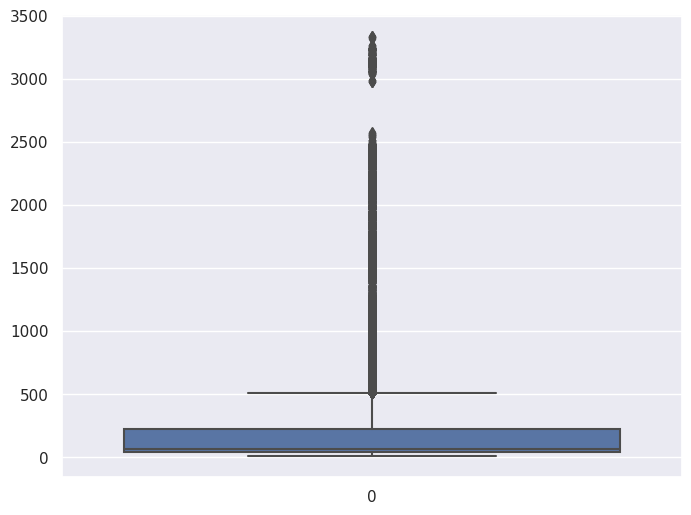

In [ ]:
#checking for outliers 
plt.figure(figsize=(8,6))
sns.boxplot(df1['Runtime']);

In [ ]:
Q1=df1['Runtime'].quantile(0.25)
Q2=df1['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LQ=Q1-1.5*IQR
UQ=Q2+1.5*IQR
df1 = df1[(df1.Runtime>LQ) & (df1.Runtime<UQ)]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


Text(0.5, 1.0, 'Box Plot of Target after Removing Outliers')

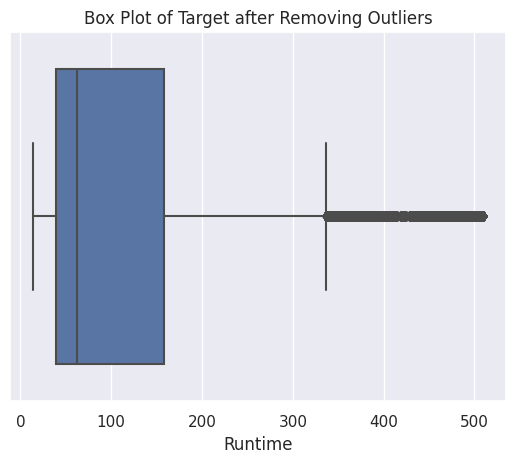

In [ ]:
plt.figure()
sns.boxplot(df1, x = df1['Runtime'])
plt.title('Box Plot of Target after Removing Outliers')

There is substantial amount of 'outliers' or extreme values in our target variable. The distribution of target is also very skewed based on boxplot even if we ignore all of the potential outliers. Removing extreme values may have a significant impact because they may contain a lot of important information. However keeping extreme values may impact performance of our models. Therefore we decided to remove them completely.



### Set Grading Criteria

In [ ]:
# get the maximum runtime
a = df1['Runtime'].max()
a

509.96250000000003

In [ ]:
# get the minimum runtime
b = df1['Runtime'].min()
b

13.317499999999999

In [ ]:
(a-b)/3

165.54833333333335

In [ ]:
df1['Label'] = pd.cut(x=df1['Runtime'], bins = [13, 165, 330, 510], labels = ['fast','medium','slow'])

<ipython-input-21-74a2d2d3f5fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = pd.cut(x=df1['Runtime'], bins = [13, 165, 330, 510], labels = ['fast','medium','slow'])


In [ ]:
df1['Label'].nunique()

3

In [ ]:
df1['Label'].value_counts()

fast      163302
medium     39508
slow       12023
Name: Label, dtype: int64

## EDA

## Data Visualization

As the majority of the data contains ordinal predictors other than Label, STRM, STRN, SA, and SB.

In [ ]:
df2 = df1.drop(['Label','STRM','STRN','SA','SB'],axis=1)
df2

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,Runtime
0,16,16,16,8,8,8,8,2,1,1,116.3700
1,16,16,16,8,8,8,8,2,1,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,80.5650
3,16,16,16,8,8,8,8,2,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,118.6625
...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,17.8175
241596,128,128,32,32,32,32,32,8,4,4,36.0350
241597,128,128,32,32,32,32,32,8,4,4,35.1600
241598,128,128,32,32,32,32,32,8,4,4,28.4525


### General Distribution

Text(0.5, 1.0, 'Count Plot for Classifying Runtime into Fast, Medium, and Slow')

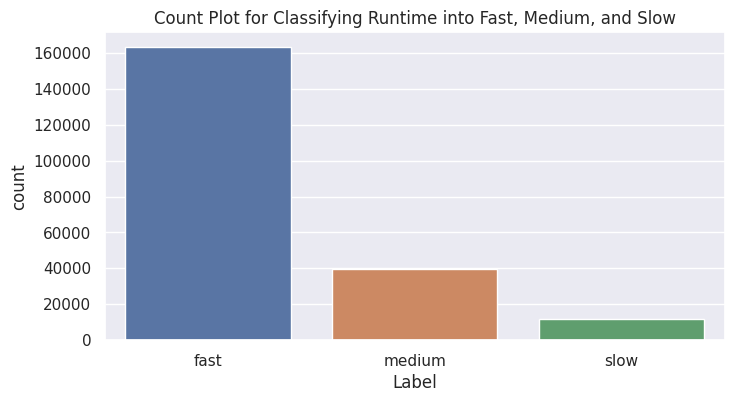

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x=df1["Label"])
plt.title("Count Plot for Classifying Runtime into Fast, Medium, and Slow")

According to the above graphs, we can see that fast has highest counts and slow has lowest counts.

In [ ]:
df1['Label'].value_counts()

fast      163302
medium     39508
slow       12023
Name: Label, dtype: int64

### Heatmap

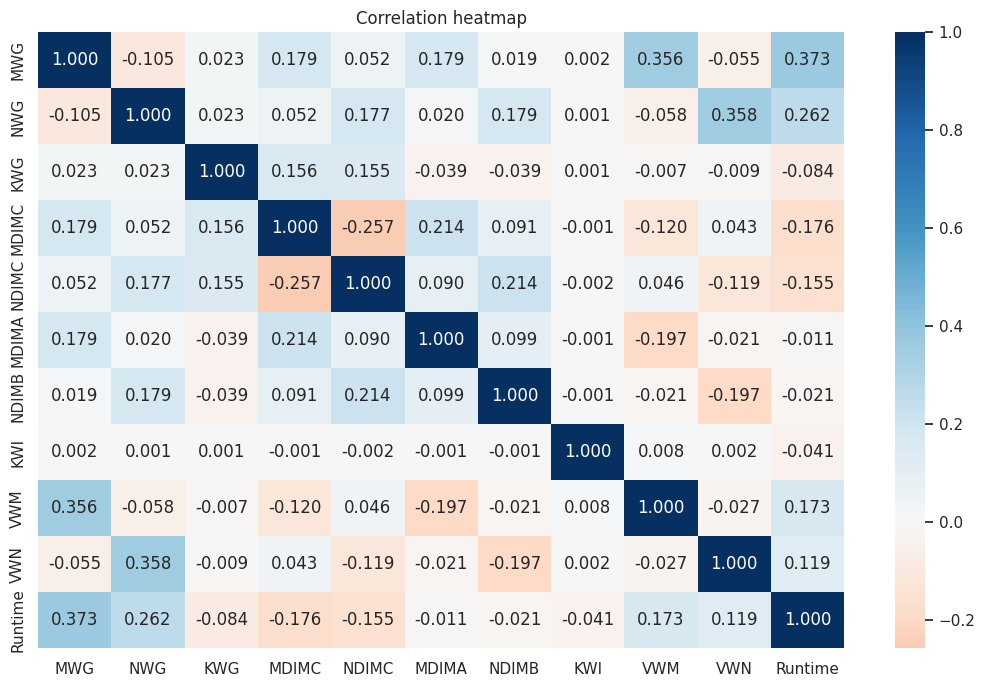

In [ ]:
## Let's Build the heatmap using seaborn
#Step 1: We need to find the correlation matrix for our data
corr_df2 = df2.corr() # we use 'corr()' function from pandas to find the correlation functio
# Use both matplotlib and seaborn to constructe our heatmap
fig, ax = plt.subplots()
fig.set_size_inches(13,8) # Give the size of our figure
sns.heatmap(corr_df2, annot=True, fmt='.3f',cmap='RdBu', center=0, ax=ax) #call we use the
ax.set_title('Correlation heatmap') # Set up the name of title
fig.show() # show the plot

From this correlation map, it is obvious that there is no strong relationship between each label. Therefore, each labels are almost indenpendent. 

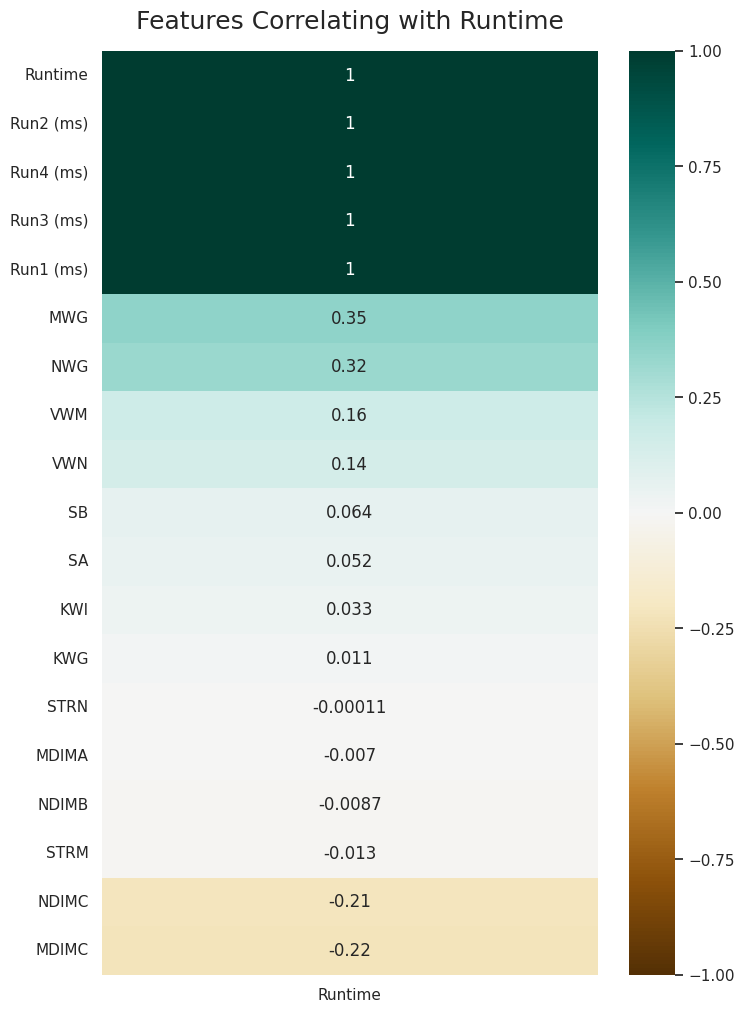

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Runtime']].sort_values(by='Runtime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Runtime', fontdict={'fontsize':18}, pad=16);

### Checking Variable distribution

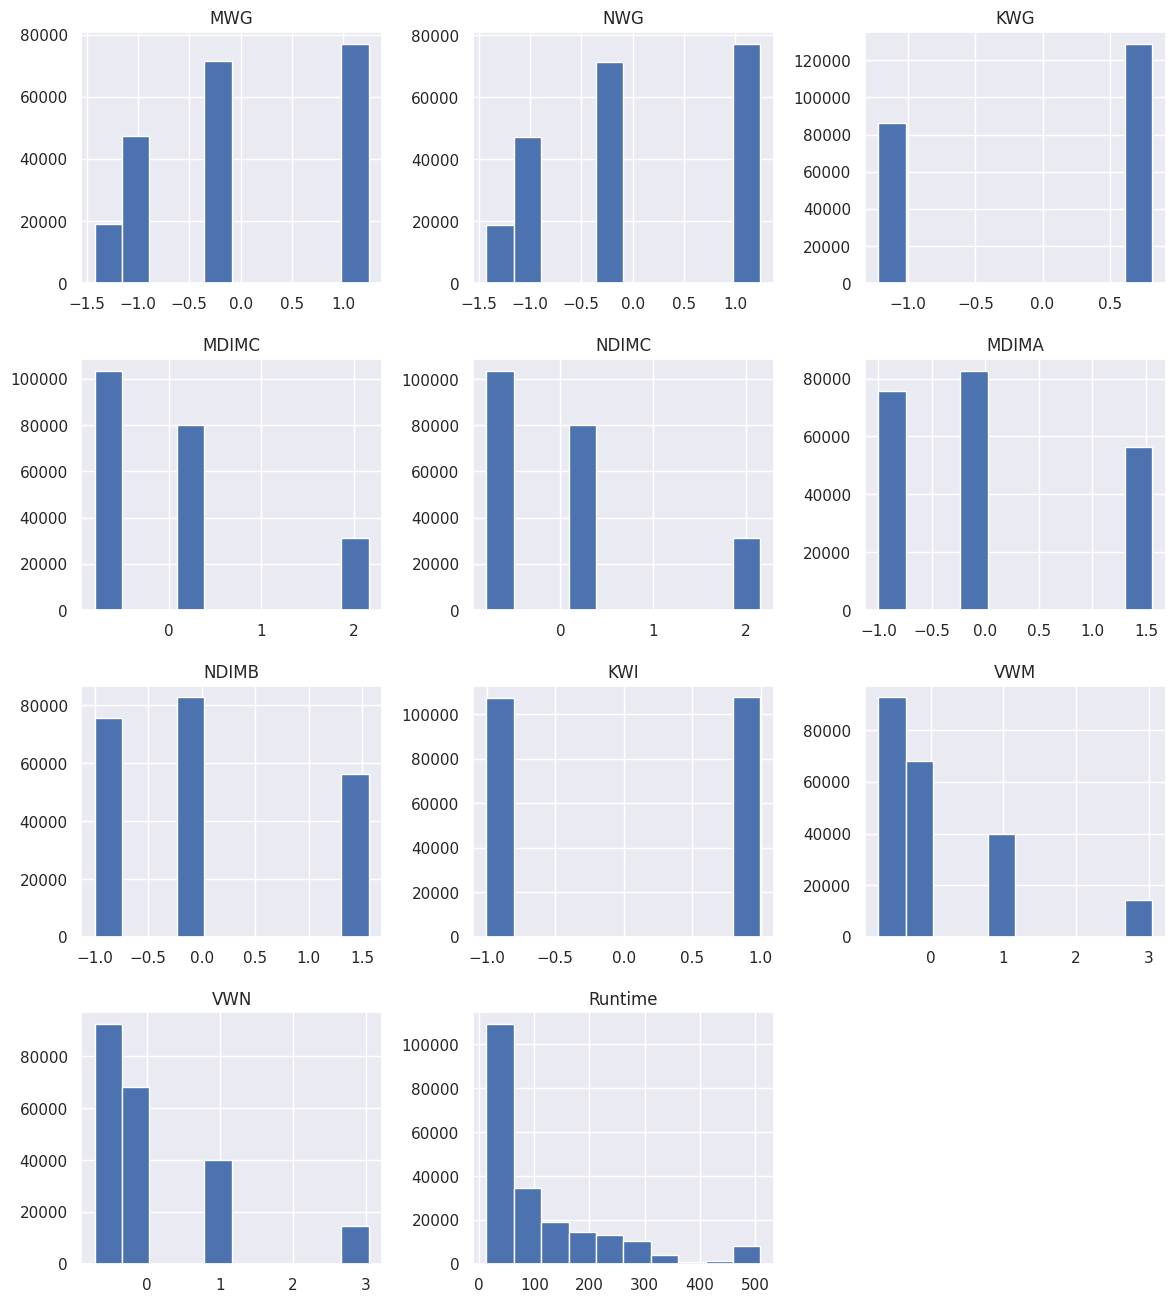

In [ ]:
#checking variable distribution
for index in range(10):
   df2.iloc[:,index] = (df2.iloc[:,index]-df2.iloc[:,index].mean()) / df2.iloc[:,index].std();
df2.hist(figsize= (14,16));

<ipython-input-30-920dd1aaca86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Runtime'])


Text(0.5, 1.0, 'Distribution Plot of Runtime')

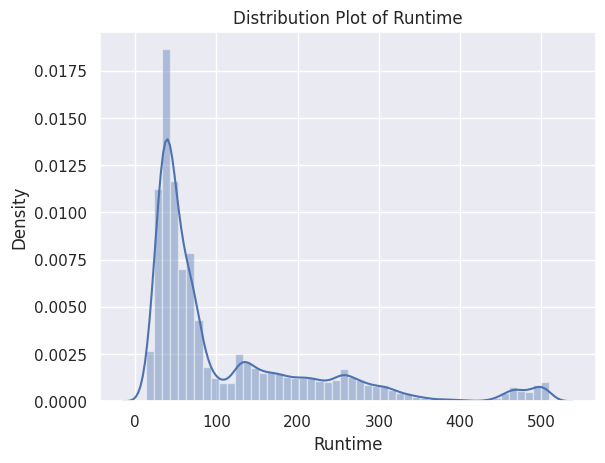

In [ ]:
#plotting the distribution of Runtime
sns.distplot(df2['Runtime'])
plt.title('Distribution Plot of Runtime')

According to this graph, density reaches peak, which is closed to 0.018 at runtime 50. In addition, it is right-skewed distribution. 

### Quantile Transformation of Target Variable

Since Machine Learning algorithms perform better with data that follow a gaussian distribution, we will seek to quantile transform the target column to an approximate normal distribution in the latter part. Such transformation will smoothen the target vdistribution. Since we have already romoved extreme values prior to transformation, we do not expect to see any residual outliers in the transformed version of the target variable

In [ ]:
# Transform the distribution to normal distribution
from sklearn.preprocessing import QuantileTransformer
import numpy as np

In [ ]:
qt = QuantileTransformer(output_distribution='normal')
target = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))

Text(0.5, 1.0, 'Distribution plot of tranformed Runtime value')

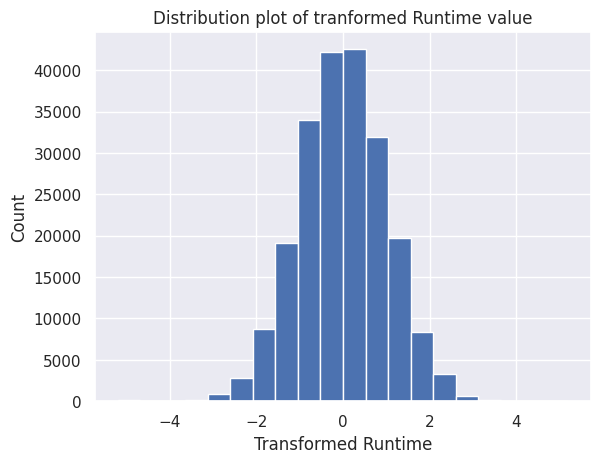

In [ ]:
plt.hist(target, bins=20)
plt.xlabel('Transformed Runtime')
plt.ylabel('Count')
plt.title("Distribution plot of tranformed Runtime value")

In [ ]:
df1['Target'] = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))
df1.drop(['Runtime'], axis=1, inplace=True)
df1

<ipython-input-34-d39bab995cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target'] = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))
<ipython-input-34-d39bab995cee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Runtime'], axis=1, inplace=True)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Label,Target
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,fast,0.419873
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,fast,0.266596
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,fast,0.282846
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,fast,0.320290
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,fast,0.425562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,fast,-2.939887
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,fast,-0.910330
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,fast,-0.971139
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,fast,-1.506947


## Feature Selection

### Getting Dummies 

In [ ]:
variables = [ x for x in df1.columns if x not in ['Target','Label']]

In [ ]:
df1 = pd.get_dummies (df1 , columns = variables )

In [ ]:
df1

,Label,Target,MWG_16,MWG_32,MWG_64,MWG_128,NWG_16,NWG_32,NWG_64,NWG_128,...,VWN_4,VWN_8,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1
0,fast,0.419873,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,fast,0.266596,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,fast,0.282846,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,fast,0.320290,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,fast,0.425562,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,fast,-2.939887,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,1,0,1
241596,fast,-0.910330,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
241597,fast,-0.971139,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
241598,fast,-1.506947,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0


In [ ]:
Label = df1['Label']

In [ ]:
X = df1.drop(['Target','Label'], axis = 1)
y = df1['Target']

In [ ]:
y

0         0.419873
1         0.266596
2         0.282846
3         0.320290
4         0.425562
            ...   
241595   -2.939887
241596   -0.910330
241597   -0.971139
241598   -1.506947
241599   -2.939887
Name: Target, Length: 214833, dtype: float64

### f_regression


F Regression is another technique for feature selection that we have explored. The idea is about fitting each feature throught an F Regression onto the target variable. This method is equivalent to N univariate regression models over which we considered each individual F-Score representing individual significance level of the regression model featuring the respective regressor. Based on 5% alpha, NWG_16 is the only feature that can be dropped. At 1% significance level, VWN_1 is the only addition whole the rest of the features are highly significant. We are able to conclude that F-regression does not provide substantive feedback as to whether further feature reduction is plausible.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import sklearn

In [ ]:
select = sklearn.feature_selection.f_regression(X,y)

featureScore = pd.DataFrame({'Feature':X.columns, 'F Scores':np.round(select[0], 5), 
                             'F Score P_Value':np.round(select[1], 5)})
featureScore['Significance 5%'] = featureScore['F Score P_Value']<.05
featureScore['Significance 1%'] = featureScore['F Score P_Value']<.01
feature = featureScore.sort_values(by='F Scores', ascending=False)
feature

,Feature,F Scores,F Score P_Value,Significance 5%,Significance 1%
3,MWG_128,24841.93096,0.00000,True,True
36,SA_0,16519.65766,0.00000,True,True
37,SA_1,16519.65766,0.00000,True,True
1,MWG_32,9867.31829,0.00000,True,True
7,NWG_128,6016.36117,0.00000,True,True
27,VWM_8,5730.25383,0.00000,True,True
38,SB_0,5375.47252,0.00000,True,True
39,SB_1,5375.47252,0.00000,True,True
13,NDIMC_8,5099.37556,0.00000,True,True
10,MDIMC_8,3778.75221,0.00000,True,True


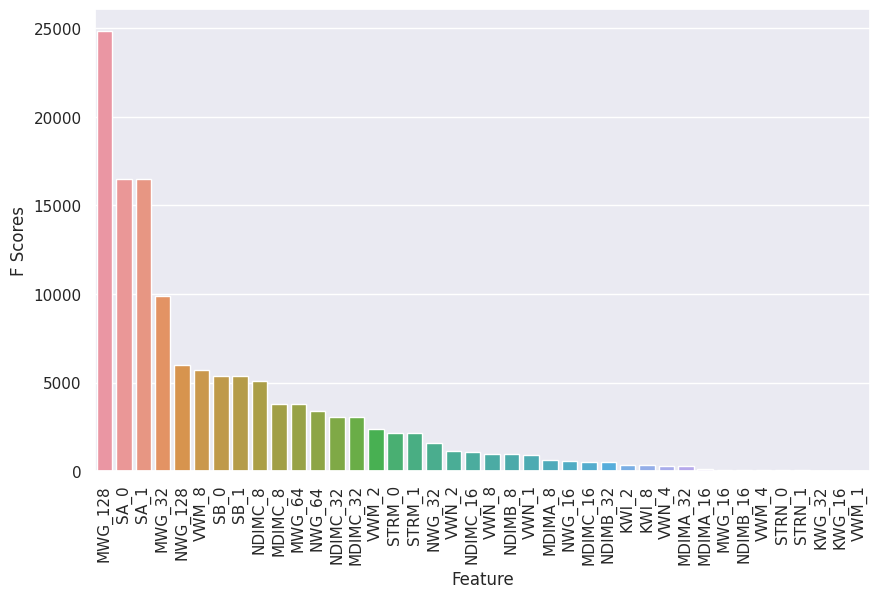

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x='Feature', y='F Scores', data=feature)
plt.xticks(rotation=90);

In [ ]:
select[0]

array([8.57706279e+01, 9.86731829e+03, 3.77628536e+03, 2.48419310e+04,
       5.92556151e+02, 1.58250085e+03, 3.38605257e+03, 6.01636117e+03,
       3.32425833e+01, 3.32425833e+01, 3.77875221e+03, 5.33790462e+02,
       3.03367105e+03, 5.09937556e+03, 1.08881119e+03, 3.05534550e+03,
       6.53612698e+02, 1.03752387e+02, 2.70523084e+02, 9.38712629e+02,
       8.55775501e+01, 5.27843526e+02, 3.26842696e+02, 3.26842696e+02,
       3.44767595e+00, 2.39279158e+03, 6.31986075e+01, 5.73025383e+03,
       8.85671694e+02, 1.13939720e+03, 3.00279594e+02, 9.54635195e+02,
       2.17889291e+03, 2.17889291e+03, 5.38460197e+01, 5.38460197e+01,
       1.65196577e+04, 1.65196577e+04, 5.37547252e+03, 5.37547252e+03])

In [ ]:
X.columns

Index(['MWG_16', 'MWG_32', 'MWG_64', 'MWG_128', 'NWG_16', 'NWG_32', 'NWG_64',
       'NWG_128', 'KWG_16', 'KWG_32', 'MDIMC_8', 'MDIMC_16', 'MDIMC_32',
       'NDIMC_8', 'NDIMC_16', 'NDIMC_32', 'MDIMA_8', 'MDIMA_16', 'MDIMA_32',
       'NDIMB_8', 'NDIMB_16', 'NDIMB_32', 'KWI_2', 'KWI_8', 'VWM_1', 'VWM_2',
       'VWM_4', 'VWM_8', 'VWN_1', 'VWN_2', 'VWN_4', 'VWN_8', 'STRM_0',
       'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')

According to the graph, MWG_128 has highest score, which is 24842

### f_classif

Alternatively, F Regression feature selection can be implemented using ANOVA feature variance test. f_classif of sklearn provides following information about the importance of our features.

In [ ]:
 from sklearn.feature_selection import f_classif

In [ ]:
print(X)

        MWG_16  MWG_32  MWG_64  MWG_128  NWG_16  NWG_32  NWG_64  NWG_128  \
0            1       0       0        0       1       0       0        0   
1            1       0       0        0       1       0       0        0   
2            1       0       0        0       1       0       0        0   
3            1       0       0        0       1       0       0        0   
4            1       0       0        0       1       0       0        0   
...        ...     ...     ...      ...     ...     ...     ...      ...   
241595       0       0       0        1       0       0       0        1   
241596       0       0       0        1       0       0       0        1   
241597       0       0       0        1       0       0       0        1   
241598       0       0       0        1       0       0       0        1   
241599       0       0       0        1       0       0       0        1   

        KWG_16  KWG_32  ...  VWN_4  VWN_8  STRM_0  STRM_1  STRN_0  STRN_1  \
0         

In [ ]:
y = df1['Target']
print(y)

0         0.419873
1         0.266596
2         0.282846
3         0.320290
4         0.425562
            ...   
241595   -2.939887
241596   -0.910330
241597   -0.971139
241598   -1.506947
241599   -2.939887
Name: Target, Length: 214833, dtype: float64


In [ ]:
select = SelectKBest(score_func = f_classif, k = 'all')
z = select.fit_transform(X,y)

In [ ]:
select.scores_

array([1.0241323 , 0.8687608 , 1.0670347 , 1.6681175 , 1.3539718 ,
       0.9417857 , 1.0613555 , 1.4045835 , 1.1252122 , 1.1254652 ,
       1.1222831 , 1.0407997 , 0.8605485 , 1.1260158 , 1.0415292 ,
       0.94654274, 1.0456481 , 0.99949294, 1.0258862 , 1.05737   ,
       1.0030886 , 1.0211115 , 1.057335  , 1.0574294 , 1.1564423 ,
       1.0409355 , 1.1951641 , 1.8177433 , 1.2520137 , 1.02279   ,
       1.1939445 , 1.423312  , 1.1014098 , 1.1012414 , 1.0239636 ,
       1.0239382 , 1.3359581 , 1.3359159 , 1.1307943 , 1.1308675 ],
      dtype=float32)

In [ ]:
X.columns

Index(['MWG_16', 'MWG_32', 'MWG_64', 'MWG_128', 'NWG_16', 'NWG_32', 'NWG_64',
       'NWG_128', 'KWG_16', 'KWG_32', 'MDIMC_8', 'MDIMC_16', 'MDIMC_32',
       'NDIMC_8', 'NDIMC_16', 'NDIMC_32', 'MDIMA_8', 'MDIMA_16', 'MDIMA_32',
       'NDIMB_8', 'NDIMB_16', 'NDIMB_32', 'KWI_2', 'KWI_8', 'VWM_1', 'VWM_2',
       'VWM_4', 'VWM_8', 'VWN_1', 'VWN_2', 'VWN_4', 'VWN_8', 'STRM_0',
       'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')

In [ ]:
featureScore = pd.DataFrame({'Feature':X.columns, 'Scores':select.scores_})

In [ ]:
featureScore

,Feature,Scores
0,MWG_16,1.024132
1,MWG_32,0.868761
2,MWG_64,1.067035
3,MWG_128,1.668118
4,NWG_16,1.353972
5,NWG_32,0.941786
6,NWG_64,1.061355
7,NWG_128,1.404583
8,KWG_16,1.125212
9,KWG_32,1.125465


In [ ]:
feature = featureScore.sort_values(by='Scores', ascending=False)
feature

,Feature,Scores
27,VWM_8,1.817743
3,MWG_128,1.668118
31,VWN_8,1.423312
7,NWG_128,1.404583
4,NWG_16,1.353972
36,SA_0,1.335958
37,SA_1,1.335916
28,VWN_1,1.252014
26,VWM_4,1.195164
30,VWN_4,1.193944


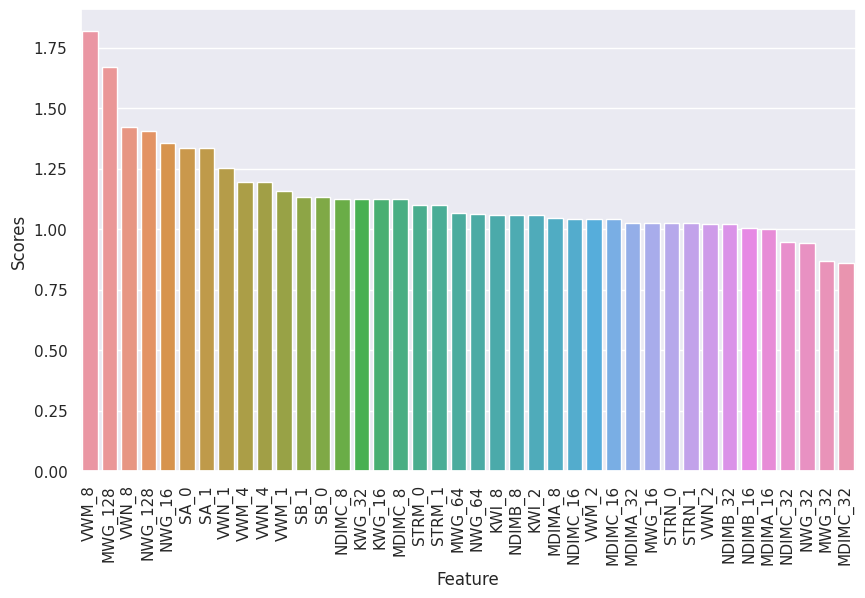

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x='Feature', y='Scores', data=feature)
plt.xticks(rotation=90);

### Using f_regression

We have decided to implement SelectKBest function based on F regression. Instead of dropping only the two viable features previously shown, we keep the top 11 features.

In [ ]:
select = SelectKBest(score_func = f_regression, k = 11)
z = select.fit_transform(X,y)

In [ ]:
filter = select.get_support()
features = X.columns

print("Selected best 8:")
print(features[filter])
print(z) 

Selected best 8:
Index(['MWG_32', 'MWG_64', 'MWG_128', 'NWG_128', 'MDIMC_8', 'NDIMC_8', 'VWM_8',
       'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 0 1]]


In [ ]:
z.shape

(214833, 11)

In [ ]:
df2 = pd.DataFrame(z)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,1,1,0,1,0,1,0
1,0,0,0,0,1,1,0,1,0,0,1
2,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0,0,1,1,0,0,0,0,1,0,1
214829,0,0,1,1,0,0,0,1,0,1,0
214830,0,0,1,1,0,0,0,1,0,0,1
214831,0,0,1,1,0,0,0,0,1,1,0


In [ ]:
df2.columns = features[filter]
df2

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
0,0,0,0,0,1,1,0,1,0,1,0
1,0,0,0,0,1,1,0,1,0,0,1
2,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0,0,1,1,0,0,0,0,1,0,1
214829,0,0,1,1,0,0,0,1,0,1,0
214830,0,0,1,1,0,0,0,1,0,0,1
214831,0,0,1,1,0,0,0,0,1,1,0


In [ ]:
df2.isnull().sum()

MWG_32     0
MWG_64     0
MWG_128    0
NWG_128    0
MDIMC_8    0
NDIMC_8    0
VWM_8      0
SA_0       0
SA_1       0
SB_0       0
SB_1       0
dtype: int64

In [ ]:
df2.shape

(214833, 11)

In [ ]:
df3 = pd.concat([df2, y,Label], axis=1)
df3

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.419873,fast
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.266596,fast
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.282846,fast
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.320290,fast
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.425562,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.939887,fast
241596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.910330,fast
241597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.971139,fast
241598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.506947,fast


In [ ]:
df3.isnull().sum()

MWG_32     16836
MWG_64     16836
MWG_128    16836
NWG_128    16836
MDIMC_8    16836
NDIMC_8    16836
VWM_8      16836
SA_0       16836
SA_1       16836
SB_0       16836
SB_1       16836
Target     16836
Label      16836
dtype: int64

In [ ]:
df4 = df3.dropna(axis = 0)
df4

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.419873,fast
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.266596,fast
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.282846,fast
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.320290,fast
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.425562,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.461456,medium
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.123741,medium
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.188266,medium
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.457620,fast


In [ ]:
df4.isnull().sum()

MWG_32     0
MWG_64     0
MWG_128    0
NWG_128    0
MDIMC_8    0
NDIMC_8    0
VWM_8      0
SA_0       0
SA_1       0
SB_0       0
SB_1       0
Target     0
Label      0
dtype: int64

In [ ]:
df4['Label'].value_counts()

fast      155911
medium     32352
slow        9734
Name: Label, dtype: int64

Text(0.5, 1.0, 'Count Plot for Classifying Runtime into Fast, Medium, and Slow')

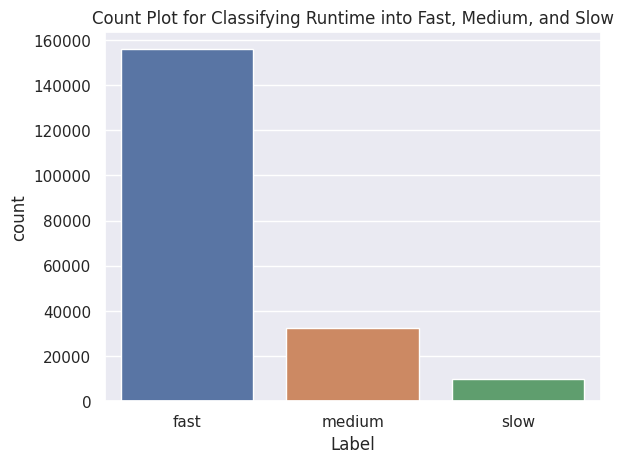

In [ ]:
sns.countplot(x=df4["Label"])
plt.title("Count Plot for Classifying Runtime into Fast, Medium, and Slow")

<ipython-input-82-9a5ada800f93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df3.corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


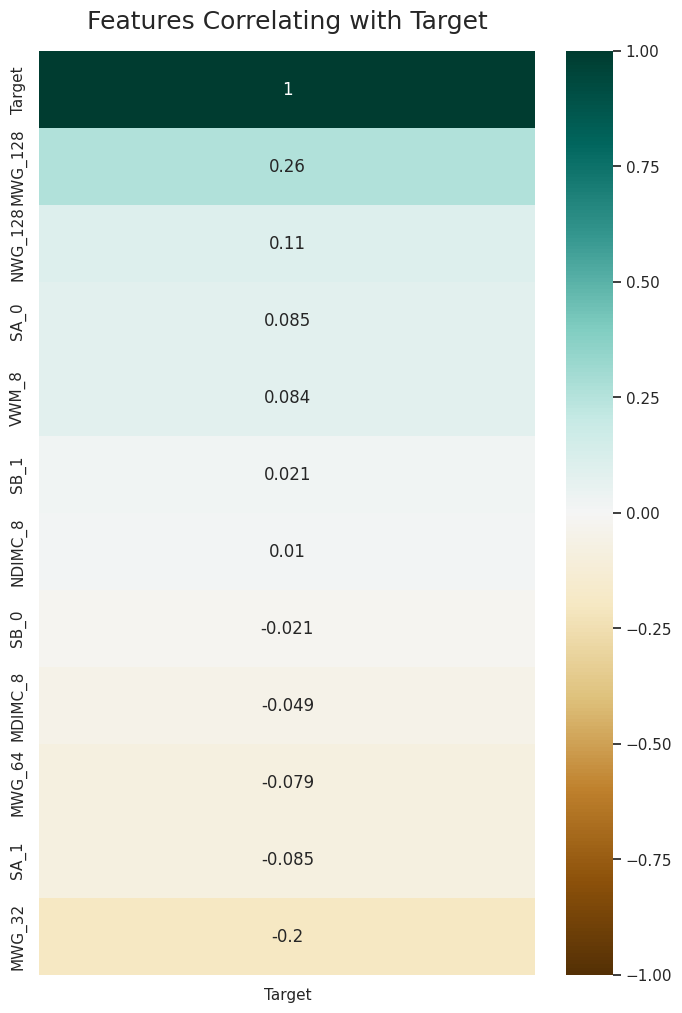

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

## Oversample(Trade off)

From the graph of correlation frequency, we know that most data are uncorrelated but there are also a few of them correlated. Besides, it also tells us that data is kind of imbalance. So we need to do dimension reduction and decide to use SMOTE to correct unbalanced data.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y = df4['Label']
y

0           fast
1           fast
2           fast
3           fast
4           fast
           ...  
214828    medium
214829    medium
214830    medium
214831      fast
214832    medium
Name: Label, Length: 197997, dtype: category
Categories (3, object): ['fast' < 'medium' < 'slow']

In [ ]:
X = df4.iloc[:,:-1]
X

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.419873
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.266596
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.282846
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.320290
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.425562
...,...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.461456
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.123741
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.188266
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.457620


In [ ]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)
df4['Label'].value_counts()

fast      155911
medium     32352
slow        9734
Name: Label, dtype: int64

## Modelling Options 

* Linear Regression (Base Line Model)
* KNN
* Neural Network

## Model Fitting

In [ ]:
X = df4.drop(['Target','Label'], axis=1)
X

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y = df4[['Target','Label']]
y

,Target,Label
0,0.419873,fast
1,0.266596,fast
2,0.282846,fast
3,0.320290,fast
4,0.425562,fast
...,...,...
214828,1.461456,medium
214829,1.123741,medium
214830,1.188266,medium
214831,0.457620,fast


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                                test_size = 0.30, random_state = 0 )

In [ ]:
sample = copy(df4)
sample['Target'] = df4['Target']
sample['Label'] = df4['Label']
sample = sample.groupby('Label').sample(100, random_state=1)
sample

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
28847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.727900,fast
121771,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,-2.738275,fast
129966,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.912892,fast
179441,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.096519,fast
76086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.092526,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207880,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.138970,slow
125740,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.784297,slow
171169,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.830291,slow
111646,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.919303,slow


In [ ]:
X_sample = sample.drop(['Target','Label'], axis=1)
X_sample

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
28847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
121771,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
129966,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
179441,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
76086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
207880,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
125740,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
171169,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
111646,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y_sample = sample[['Target','Label']]

In [ ]:
y_sample

,Target,Label
28847,-0.727900,fast
121771,-2.738275,fast
129966,-1.912892,fast
179441,0.096519,fast
76086,-1.092526,fast
...,...,...
207880,2.138970,slow
125740,1.784297,slow
171169,1.830291,slow
111646,1.919303,slow


In [ ]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, 
                                                                                y_sample, 
                                                                                test_size = 0.30, random_state = 0 )

## Linear Regression

We have estabilished our own Class for Linear Regression. It is based on gradient descent method. We initialize all weights on features and intercept to be zero and iterative update the weight vector and intercept constant until improvement in sum of squared residuals, consequently the mean error, is no longer significant.  



In [ ]:
class LinearRegression:

    def __init__(self, learningRate, maxIteration):

        self.maxIteration = maxIteration
        self.learningRate = learningRate

    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def gradientDescent(self):
        
        y_hat = self.predict(self.X)

        dw = - (2 * (self.X.T ).dot(self.y - y_hat )) / self.m
        db = - 2 * np.sum(self.y - y_hat) / self.m

        self.w = self.w - self.learningRate * dw
        self.b = self.b - self.learningRate * db

        return self
    
    def fit(self, X, y):
        
        self.m = X.shape[0]
        self.w = np.ones(X.shape[1], dtype=np.float64) * 0
        self.b = 0
        self.X = X
        self.y = y

        for i in tqdm(range(self.maxIteration)):
          self.gradientDescent()

In [ ]:
error_rate = []
error_rate_train = []
for i in range(100,3000,500):
  lr = LinearRegression(maxIteration = i, learningRate = 0.01)
  lr.fit(X_train, y_train['Target'])
  error_rate.append(mean_squared_error(y_test['Target'], lr.predict(X_test)))
  error_rate_train.append(mean_squared_error(y_train['Target'], lr.predict(X_train)))

100%|██████████| 2600/2600 [00:21<00:00, 118.69it/s]


Text(0, 0.5, 'Error Rate')

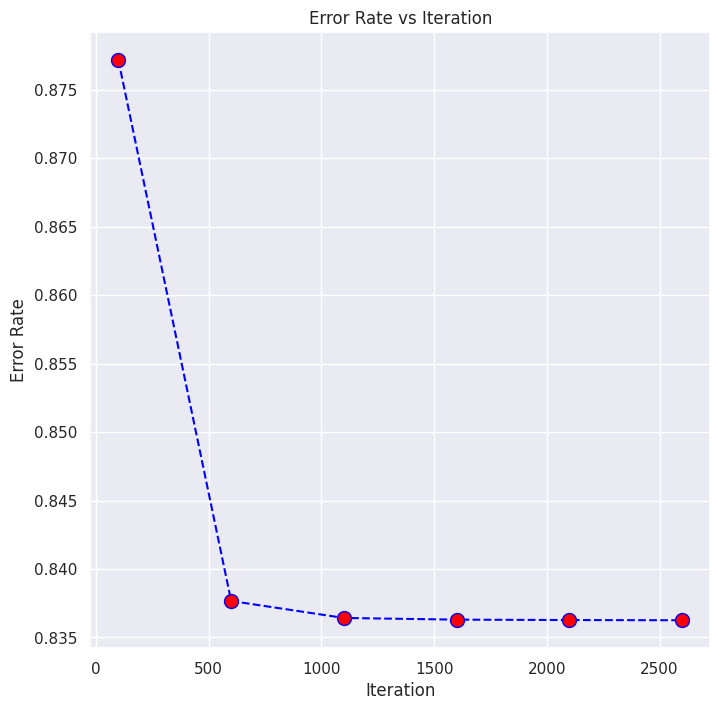

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(100,3000,500), error_rate, 
         color = 'g', 
         linestyle = 'dashed', 
         marker = 'X', 
         markerfacecolor = 'blue', 
         markersize = 10);
plt.title('Error Rate vs Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')

The Linear Regression class takes two arguments, maxinumber of iterations and stepsize for gradient descent. Our procedure for fititng data to the linear regresison model is to first identify an optimal stopping condition for the algorithm. That is to iteratively try running the algorithm for different number of iterations and determine the ideal number that does not compromise running speed for insignificant additinal accuracy of estimated parameters. As shown in the figure above,improvement in terms of mean RMSE is no longer significant after 1500 iterations. Therefore 1500 is the maximum number of iterations we will use in eventual Linear Regression fitting.



The next step is to find the optimal stepsize for gradient descent. Similarly we iterate trough a series of varying sizes and compare RMSE improvement. If at a certain rate improvement becomes minimual, we will not chose a learning rate that is smaller than it because overly small stepsize or large stepsizes incur costs in terms of non-convergence and runtime.

As the following figure suggest, we do not benefit much from futher reducing learning rate from 0.07. Instead of sacrificing running time and convergence speed, we will use 0.07.

In [ ]:
error_rate = []
error_rate_train = []
for i in range(1,10,2):
  lr = LinearRegression(maxIteration = 2500, learningRate = i*0.01)
  lr.fit(X_train, y_train['Target'])
  error_rate.append(mean_squared_error(y_test['Target'], lr.predict(X_test)))
  error_rate_train.append(mean_squared_error(y_train['Target'], lr.predict(X_train)))

100%|██████████| 2500/2500 [00:43<00:00, 57.66it/s]


Text(0, 0.5, 'Error Rate')

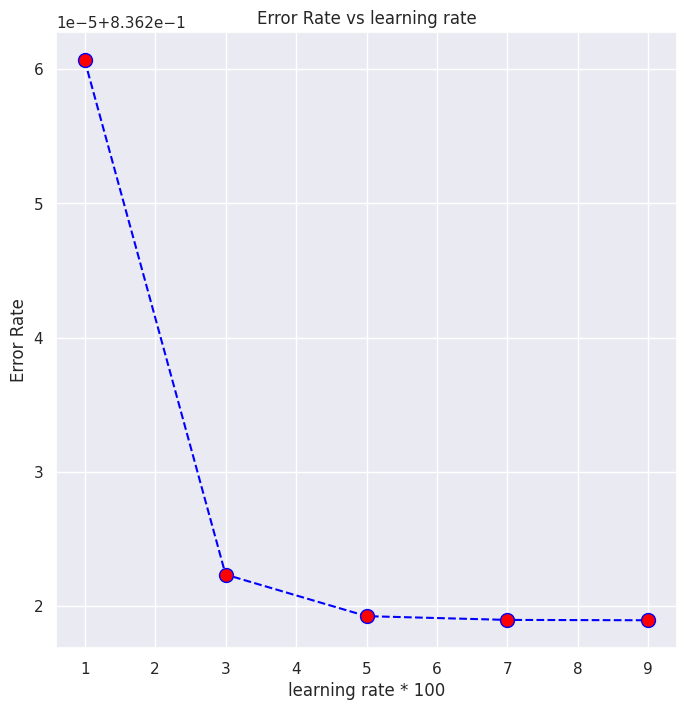

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,10,2), error_rate, 
         color = 'purple', 
         linestyle = 'dashed', 
         marker = 'D', 
         markerfacecolor = 'c', 
         markersize = 10);
plt.title('Error Rate vs GD Step Size')
plt.xlabel('Learning Rate * 100')
plt.ylabel('Error Rate')

In [ ]:
lr = LinearRegression(maxIteration = 1500, learningRate = 0.07)
start_time = timeit.default_timer()
lr.fit(X_train, y_train['Target'])
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(lr.predict(X_test),y_test['Target'])))
print('MAE', mean_absolute_error(lr.predict(X_test),y_test['Target']))

100%|██████████| 1500/1500 [00:11<00:00, 136.05it/s]

Training Time:  11.033180236000021
RMSE 0.914450508402853
MAE 0.7271524525739602


## KNN

In [ ]:
def distNeighbours(X_train,y_train,X_test,K):

  distance=[]
  for i in range(len(X_train)):
    d=0
      
    for j in range(len(X_train.columns)):   
        d+=round(np.sqrt((X_train.iloc[i,j]-X_test[j])**2),2)
          
    distance.append((d,y_train.iloc[i]))
    distance=sorted(distance, key=lambda x: x[0])[0:K]
  return distance

def predictOutputNumeric(X_train,y_train,X_test,K):
  neighbours=[]
  result=[]
  for i in range(len(X_test)):
    neighbours.append(distNeighbours(X_train,y_train,X_test.iloc[i,:],K))
  for i in neighbours:
    mean=0
    for j in i:
      mean+=j[-1]
    mean=mean/K
    result.append(mean)
  return result

In [ ]:
error_rate = []
error_rate_train = []
for i in range(3,30,10):
  o = predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_test_sample,i)
  o_train = predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_train_sample,i)
  error_rate.append(mean_squared_error(y_test_sample['Target'], o))
  error_rate_train.append(mean_squared_error(y_train_sample['Target'], o_train))

Text(0, 0.5, 'Error Rate')

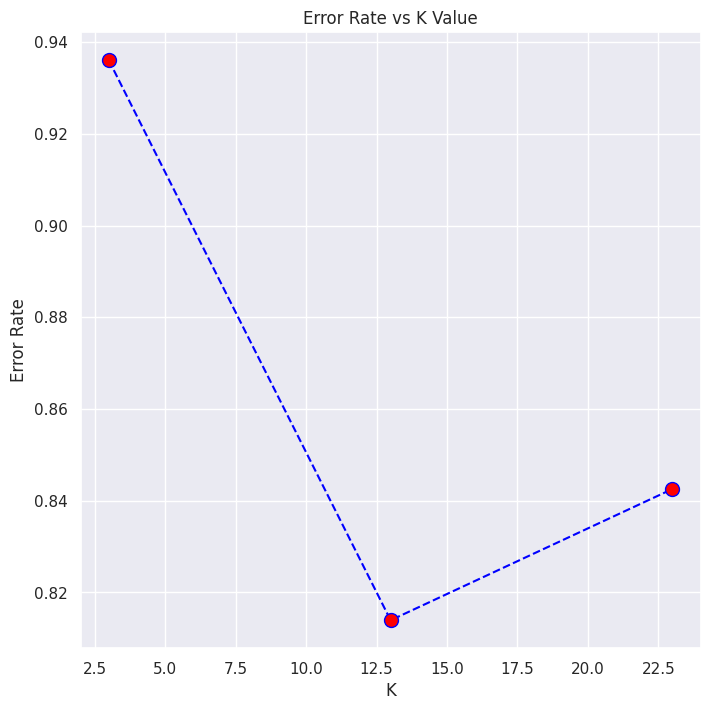

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(3,30,10), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
start_time = timeit.default_timer()
knn=predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_test_sample,13)
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(y_test_sample['Target'], knn)))
print('MAE', mean_absolute_error(y_test_sample['Target'], knn))

Training Time:  11.152281124999945
RMSE 0.902186481977602
MAE 0.6751234205396915


Our K-Nearest-Neighbors model is fitted using a sample of size 300 observations from the training data we created earlier. Due to extreme runtime complexity of the looped version of KNN algorithms, fitting our entire training set of 130,000+ observations is a challenge that is hard to overcome. 

We iterated through few choices for K, the numbers of 'neighbor', and determined that 13 is optimal. We see promising outcome from this reduced version that Root Mean Squared Error and Mean Absolute Error and both better than the outcome from Linear Regression that we saw priorly.

## Neural Network

In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import Model
from collections import Counter

In [ ]:
nn = Sequential()
nn.add(Dense(1, input_shape=(11,), activation='relu'))

nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
error_rate = []
error_rate_train = []
for i in range(100,300,50):
  nn.fit(X_train_sample, y_train_sample['Target'], epochs=i, batch_size=20, verbose=0, validation_split=0.3)
  error_rate.append(mean_squared_error(y_test_sample['Target'], nn.predict(X_test_sample)))
  error_rate_train.append(mean_squared_error(y_train_sample['Target'], nn.predict( X_train_sample)))

7/7 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Error Rate')

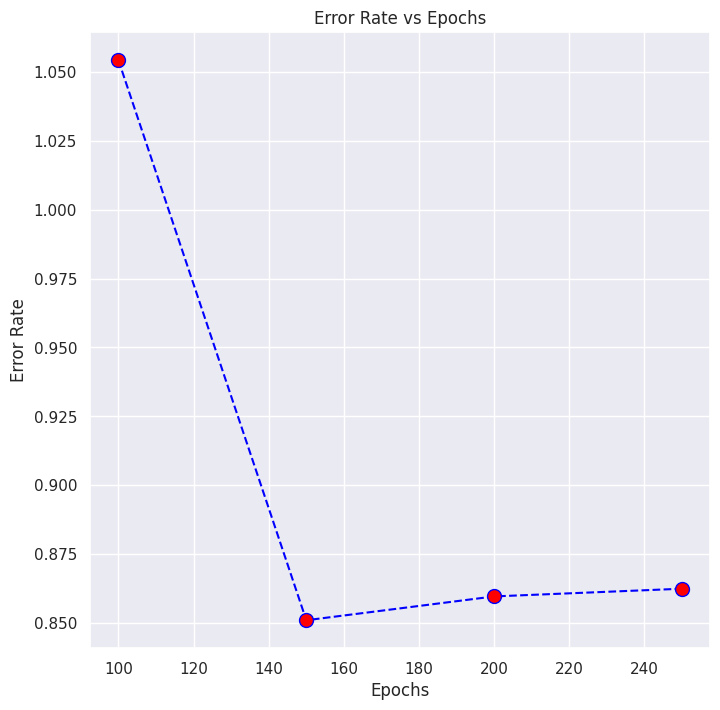

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(100,300,50), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')

In [ ]:
start_time = timeit.default_timer()
nn.fit(X_train, y_train['Target'], epochs=200, batch_size=20, verbose=2, validation_split=0.2)
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(y_test['Target'], nn.predict(X_test))))
print('MAE', mean_absolute_error(y_test['Target'], nn.predict(X_test)))

Epoch 1/200
5544/5544 - 9s - loss: 0.7505 - mean_squared_error: 0.9281 - val_loss: 0.7384 - val_mean_squared_error: 0.9025 - 9s/epoch - 2ms/step
Epoch 2/200
5544/5544 - 9s - loss: 0.7430 - mean_squared_error: 0.9165 - val_loss: 0.7376 - val_mean_squared_error: 0.9080 - 9s/epoch - 2ms/step
Epoch 3/200
5544/5544 - 8s - loss: 0.7427 - mean_squared_error: 0.9186 - val_loss: 0.7377 - val_mean_squared_error: 0.9067 - 8s/epoch - 1ms/step
Epoch 4/200
5544/5544 - 10s - loss: 0.7427 - mean_squared_error: 0.9187 - val_loss: 0.7376 - val_mean_squared_error: 0.9065 - 10s/epoch - 2ms/step
Epoch 5/200
5544/5544 - 9s - loss: 0.7426 - mean_squared_error: 0.9194 - val_loss: 0.7374 - val_mean_squared_error: 0.9062 - 9s/epoch - 2ms/step
Epoch 6/200
5544/5544 - 9s - loss: 0.7426 - mean_squared_error: 0.9192 - val_loss: 0.7374 - val_mean_squared_error: 0.9079 - 9s/epoch - 2ms/step
Epoch 7/200
5544/5544 - 9s - loss: 0.7425 - mean_squared_error: 0.9197 - val_loss: 0.7378 - val_mean_squared_error: 0.9037 - 9s/

Similar to KNN we only used the sample from training data to helt determine desired size for Epoch. After choosing 200, we proceeded with fitting the Neural Network model with the entire training dataset of 13k+ observations. We get RMSE= .9521 and MAE = .7369 

## Result Comparison

1.
In linear regression, we set two parameters, maxIteration and learning rate. Maxiteration represents the number of iterations in linear regression, which equal to 1500, and learning rate represents the step size at each iteration while moving toward a minimum of a loss function, which equal to 0.07. In addition, we also created a graph representing the relationship between error rate and iteration function. After a series calculations and drawing graphs, we summarized that training time = 11.033, RMSE = 0.914 and MSE = 0.727.

2.
In KNN, we also created graph showing the relationship between error rate and iteration. Since the idea of this model is to choose the k nearest neighbors and calculate their average value of them and set the value of the new variable equal to the average, K value (i.e. the number of nearest neighbors) is the important parameter in KNN model. Therefore, we set K = 13 to perform the next step. Then, we got training time = 11.152, RMSE = 0.902 and MSE = 0.675.

3.
In Neural Network, we created the graph showing the relationship between error rate and epochs. We got training time is 1762.953, RMSE = 0.952,and MSE = 0.737.

4.
After having applied linear Regression, KNN and Neural Network, comparison between RMSE and MSE results obtained from three different models respective as well as runtime performances allows us to draw conclusion. Due to the fact that Neutral Network not only consumes substantial training time without genarating relatively lower RMSE and MSE values, we would not choose Neutral Network as our most suitable alorithm for the given dataset. In contrast to linear regression, KNN has lower RMSE and MAE values, at the cost of training time that is slightly higher than that of linear regression. Therefore, we would reach the conclusin that KNN is the best model of all three examined.

## Discussions

We have a complicated dataset that is consist of entirely catagorical features. This disadvantage ruled out our chance of conducting straightforward dimension reduction via PCA. To counter this issue we explored few alternative methods for feature selection to achieve reduction in dimensionality. In addition to the complexity involving feature data, we also as a highly positively skewed target variable containing roughly 10% of values that are significantly deviated from the remaining 90%. Since we could not determine whether this was the result of natural poor GPU runtime performance under certain specifications or the data creator made errors while collecting data, We proceeded with our model fitting by disregarding all of such extreme values.

In addition, our dataset is large and algorithms such as KNN that are designed based on nested loops tend to perform poorly in terms of runtime because complexity increases exponentially alongside sample size.   At the end we could only employ our KNN algorithm using a small sample of the training set. Despite that, we still were to be find best prediction errors using KNN, suggesting that KNN regression method is the best option amongst all considered and evaluated for descovering patterns within continuous target and entirely catagorical independednt variable.  